In [ ]:
!unzip CCPD2020.zip

Archive:  CCPD2020.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of CCPD2020.zip or
        CCPD2020.zip.zip, and cannot find CCPD2020.zip.ZIP, period.


In [ ]:
!zip -r output.zip folder_name


Mounted at /content/drive
📂 找到 5780 张图片，随机抽取 3 张验证...


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26512 (\N{CJK UNIFIED IDEOGRAPH-6790}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30358 (\N{CJK UNIFIED IDEOGRAPH-7696}) missing from font(s) DejaVu Sans.
  fig.canvas

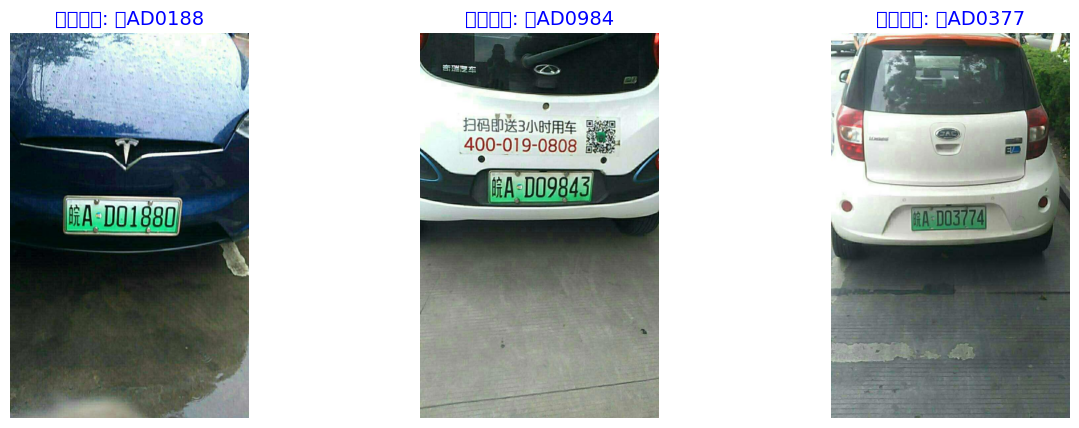

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import cv2
import matplotlib.pyplot as plt
import re

# ================= 配置 =================
# 你的 CCPD 数据集路径 (Drive 里的源文件)
CCPD_SRC_DIR = "/content/drive/MyDrive/car_project/dataset/VOC2007/JPEGImages"
# ================= CCPD 官方标准字典 (绝对不能改!) =================
# 省份 (0-30) - 注意：CCPD里 0是皖
PROVINCES = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学"]

# 字母数字 (0-33)
ADS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def parse_ccpd_name(filename):
    try:
        # 去掉 (1) 等后缀
        filename = re.sub(r'\s*\(\d+\)', '', filename)
        parts = filename.split('-')

        # 解析车牌索引 (第5部分, 索引4)
        # 格式: province_alpha_ad1_ad2_ad3_ad4_ad5
        plate_str = parts[4]
        ids = [int(x) for x in plate_str.split('_')]

        # 映射字符
        # 第1位是省份
        res = PROVINCES[ids[0]]
        # 第2位是字母
        res += ADS[ids[1]]
        # 后5位是字母或数字
        for i in range(2, 7):
            res += ADS[ids[i]]

        return res
    except:
        return "ParseError"

# ================= 测试逻辑 =================
if not os.path.exists(CCPD_SRC_DIR):
    print("❌ 找不到目录，请检查 Google Drive 路径是否正确！")
else:
    files = [f for f in os.listdir(CCPD_SRC_DIR) if f.endswith('.jpg')]
    print(f"📂 找到 {len(files)} 张图片，随机抽取 3 张验证...")

    import random
    samples = random.sample(files, 3)

    plt.figure(figsize=(15, 5))
    for i, fname in enumerate(samples):
        img_path = os.path.join(CCPD_SRC_DIR, fname)
        img = cv2.imread(img_path)

        # 解析
        plate_text = parse_ccpd_name(fname)

        plt.subplot(1, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"解析结果: {plate_text}", fontsize=14, color='blue')
        plt.axis('off')
    plt.show()

📂 找到 5780 张图片，抽取 3 张验证...

🖼️ 图片 1: 皖AD08848  (文件名: 0133875868056-88_269-227&410_4...)
🖼️ 图片 2: 皖AD06500  (文件名: 3008909505208333333-89_93-303&...)
🖼️ 图片 3: 皖AD39055  (文件名: 3013802083333333333-91_267-198...)


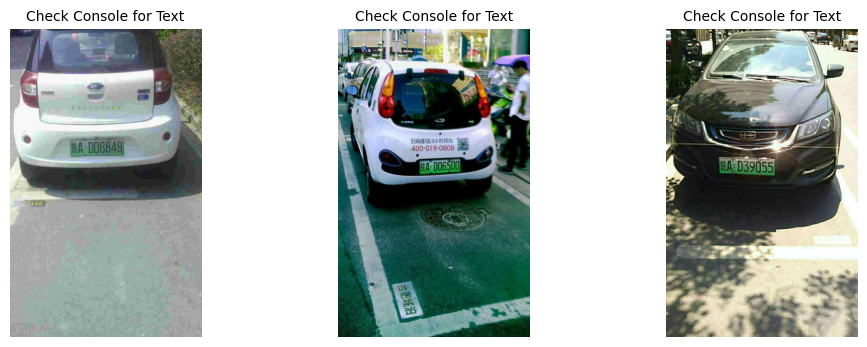

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import re

# ================= 配置 =================
# 你的 CCPD 数据集路径
CCPD_SRC_DIR = "/content/drive/MyDrive/car_project/dataset/VOC2007/JPEGImages"

# ================= CCPD 官方字典 =================
PROVINCES = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学"]
ADS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def parse_ccpd_dynamic(filename):
    try:
        filename = re.sub(r'\s*\(\d+\)', '', filename) # 去掉 (1)
        parts = filename.split('-')

        # 索引 4 是车牌内容
        plate_str = parts[4]
        ids = [int(x) for x in plate_str.split('_')]

        # 组装字符
        # 第1位：省份
        res = PROVINCES[ids[0]]
        # 第2位：字母
        res += ADS[ids[1]]
        # 后续所有位：自动循环（不管是5位还是6位）
        for i in ids[2:]:
            res += ADS[i]

        return res
    except:
        return "解析错误"

# ================= 验证逻辑 =================
if not os.path.exists(CCPD_SRC_DIR):
    print("❌ 找不到目录")
else:
    files = [f for f in os.listdir(CCPD_SRC_DIR) if f.endswith('.jpg')]
    print(f"📂 找到 {len(files)} 张图片，抽取 3 张验证...\n")

    import random
    samples = random.sample(files, 3)

    plt.figure(figsize=(12, 4))
    for i, fname in enumerate(samples):
        img_path = os.path.join(CCPD_SRC_DIR, fname)
        img = cv2.imread(img_path)

        # 解析
        plate_text = parse_ccpd_dynamic(fname)

        # 打印到控制台 (支持中文)
        print(f"🖼️ 图片 {i+1}: {plate_text}  (文件名: {fname[:30]}...)")

        # 画图 (标题只显示英文部分，避免乱码干扰视觉)
        plt.subplot(1, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Check Console for Text", fontsize=10)
        plt.axis('off')
    plt.show()

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import shutil
import re

# ================= 配置 =================
DRIVE_SRC_DIR = "/content/drive/MyDrive/car_project/dataset/VOC2007/JPEGImages"
LOCAL_SRC_DIR = "/content/temp_ccpd"
DATA_ROOT = "/content/LPR_Train_Data"

# 字典
PROVINCES = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学"]
ADS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def parse_plate_dynamic(filename):
    try:
        filename = re.sub(r'\s*\(\d+\)', '', filename)
        parts = filename.split('-')

        # 解析框
        bbox_str = parts[2]
        p1, p2 = bbox_str.split('_')
        x1, y1 = p1.split('&')
        x2, y2 = p2.split('&')
        bbox = [int(x1), int(y1), int(x2), int(y2)]

        # 解析字符 (动态长度)
        ids = [int(x) for x in parts[4].split('_')]
        text = PROVINCES[ids[0]] + ADS[ids[1]]
        for i in ids[2:]:
            text += ADS[i]

        return bbox, text
    except:
        return None, None

# ================= 主流程 =================
if not os.path.exists(LOCAL_SRC_DIR):
    print("🚀 复制数据到本地加速...")
    shutil.copytree(DRIVE_SRC_DIR, LOCAL_SRC_DIR)

# 清理旧数据 (如果有)
if os.path.exists(DATA_ROOT):
    shutil.rmtree(DATA_ROOT)
os.makedirs(os.path.join(DATA_ROOT, "images"), exist_ok=True)

files = os.listdir(LOCAL_SRC_DIR)
lines = []
count = 0
TARGET = 6000

print(f"🔥 开始生成 {TARGET} 张训练数据...")
for fname in tqdm(files):
    if not fname.endswith('.jpg'): continue

    bbox, text = parse_plate_dynamic(fname)
    if not bbox: continue

    img = cv2.imread(os.path.join(LOCAL_SRC_DIR, fname))
    if img is None: continue

    # 抠图 + Padding
    x1, y1, x2, y2 = bbox
    w, h = x2-x1, y2-y1
    px, py = int(w*0.08), int(h*0.08)
    x1, y1 = max(0, x1-px), max(0, y1-py)
    x2, y2 = min(img.shape[1], x2+px), min(img.shape[0], y2+py)

    if x2-x1 < 10 or y2-y1 < 10: continue

    crop = img[y1:y2, x1:x2]

    # 保存
    save_name = f"{count:06d}.jpg"
    cv2.imwrite(os.path.join(DATA_ROOT, "images", save_name), crop)
    lines.append(f"{save_name} {text}\n")

    count += 1
    if count >= TARGET: break

with open(os.path.join(DATA_ROOT, "labels.txt"), "w") as f:
    f.writelines(lines)

print(f"✅ 完成！请继续使用之前的训练脚本进行训练。")

🔥 开始生成 6000 张训练数据...


100%|██████████| 11/11 [00:00<00:00, 250.53it/s]

✅ 完成！请继续使用之前的训练脚本进行训练。


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import shutil
import re
import glob

# ================= 配置 =================
DRIVE_SRC_DIR = "/content/drive/MyDrive/car_project/dataset/VOC2007/JPEGImages"
LOCAL_SRC_DIR = "/content/temp_ccpd"
DATA_ROOT = "/content/LPR_Train_Data"
TARGET = 6000

# 字典
PROVINCES = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学"]
ADS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def parse_plate_dynamic(filename):
    try:
        filename = os.path.basename(filename)
        filename = re.sub(r'\s*\(\d+\)', '', filename)
        parts = filename.split('-')
        if len(parts) < 7: return None, None

        bbox_str = parts[2]
        p1, p2 = bbox_str.split('_')
        x1, y1 = p1.split('&')
        x2, y2 = p2.split('&')
        bbox = [int(x1), int(y1), int(x2), int(y2)]

        ids = [int(x) for x in parts[4].split('_')]
        text = PROVINCES[ids[0]] + ADS[ids[1]]
        for i in ids[2:]:
            text += ADS[i]
        return bbox, text
    except:
        return None, None

# ================= 主流程 =================
print("🧹 正在清理旧的残缺数据...")
if os.path.exists(LOCAL_SRC_DIR):
    shutil.rmtree(LOCAL_SRC_DIR) # 强制删除，防止上次没拷完
    print("✅ 已删除残缺目录")

if os.path.exists(DATA_ROOT):
    shutil.rmtree(DATA_ROOT)
os.makedirs(os.path.join(DATA_ROOT, "images"), exist_ok=True)

print(f"🚀 正在从 Drive 复制数据 (这次一定要等它复制完)...")
print(f"源路径: {DRIVE_SRC_DIR}")
# 重新复制
shutil.copytree(DRIVE_SRC_DIR, LOCAL_SRC_DIR)
print("✅ 复制完成！")

# 扫描
all_files = glob.glob(os.path.join(LOCAL_SRC_DIR, "**", "*.jpg"), recursive=True)
print(f"📊 这次找到了 {len(all_files)} 张图片。")

lines = []
count = 0

print(f"🔥 开始生成数据...")
for fpath in tqdm(all_files):
    fname = os.path.basename(fpath)
    bbox, text = parse_plate_dynamic(fname)

    if not bbox: continue

    img = cv2.imread(fpath)
    if img is None: continue

    x1, y1, x2, y2 = bbox
    w, h = x2-x1, y2-y1
    px, py = int(w*0.08), int(h*0.08)
    x1, y1 = max(0, x1-px), max(0, y1-py)
    x2, y2 = min(img.shape[1], x2+px), min(img.shape[0], y2+py)

    if x2-x1 < 10 or y2-y1 < 10: continue

    crop = img[y1:y2, x1:x2]

    save_name = f"{count:06d}.jpg"
    cv2.imwrite(os.path.join(DATA_ROOT, "images", save_name), crop)
    lines.append(f"{save_name} {text}\n")

    count += 1
    if count >= TARGET: break

with open(os.path.join(DATA_ROOT, "labels.txt"), "w") as f:
    f.writelines(lines)

print(f"✅ 大功告成！生成了 {count} 张。请立刻去训练！")

🧹 正在清理旧的残缺数据...
🚀 正在从 Drive 复制数据 (这次一定要等它复制完)...
源路径: /content/drive/MyDrive/car_project/dataset/VOC2007/JPEGImages
✅ 复制完成！
📊 这次找到了 5780 张图片。
🔥 开始生成数据...


100%|██████████| 5780/5780 [00:24<00:00, 236.83it/s]

✅ 大功告成！生成了 5780 张。请立刻去训练！


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import shutil
import re
import glob

# ================= 配置区 =================
# 1. 源数据路径 (先用 Drive 里的路径，脚本会自动复制)
DRIVE_SRC_DIR = "/content/drive/MyDrive/car_project/dataset/VOC2007/JPEGImages"
LOCAL_SRC_DIR = "/content/temp_ccpd"
DATA_ROOT = "/content/LPR_Train_Data"

# 2. 目标生成数量
TARGET = 6000

# ================= 字典 (生成 Label 用) =================
# 必须和后续训练代码的 CHARS 保持一致！(66类，无I/O)
PROVINCES = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学"]
ADS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def parse_plate_dynamic(filename):
    try:
        # 去掉路径，只留文件名
        filename = os.path.basename(filename)
        filename = re.sub(r'\s*\(\d+\)', '', filename)
        parts = filename.split('-')

        # CCPD 文件名必须有 7 个部分
        if len(parts) < 7: return None, "格式错误(parts<7)"

        # 解析框 (索引2)
        bbox_str = parts[2]
        p1, p2 = bbox_str.split('_')
        x1, y1 = p1.split('&')
        x2, y2 = p2.split('&')
        bbox = [int(x1), int(y1), int(x2), int(y2)]

        # 解析字符 (索引4)
        ids = [int(x) for x in parts[4].split('_')]
        text = PROVINCES[ids[0]] + ADS[ids[1]]
        for i in ids[2:]:
            text += ADS[i]

        return bbox, text
    except Exception as e:
        return None, f"解析异常: {str(e)}"

# ================= 主流程 =================
print("🚀 步骤 1: 准备数据...")

# 1. 复制数据 (如果本地没有)
if not os.path.exists(LOCAL_SRC_DIR):
    print(f"   正在从 Drive 复制到 {LOCAL_SRC_DIR} (请耐心等待)...")
    # 使用 copytree 可能因为子目录报错，我们手动创建目录并复制
    try:
        shutil.copytree(DRIVE_SRC_DIR, LOCAL_SRC_DIR)
    except Exception as e:
        print(f"   ⚠️ 复制时遇到小问题 (可能部分文件已存在): {e}")
else:
    print("   本地数据已存在，跳过复制。")

# 2. 准备输出目录
if os.path.exists(DATA_ROOT):
    shutil.rmtree(DATA_ROOT) # 清理旧数据，重新开始
os.makedirs(os.path.join(DATA_ROOT, "images"), exist_ok=True)

# 3. 递归查找所有 jpg (不管在第几层目录)
print("🔍 正在扫描所有图片文件 (递归)...")
# glob 递归查找
all_files = glob.glob(os.path.join(LOCAL_SRC_DIR, "**", "*.jpg"), recursive=True)
all_files += glob.glob(os.path.join(LOCAL_SRC_DIR, "**", "*.JPG"), recursive=True)

print(f"📊 扫描结果: 找到了 {len(all_files)} 张图片文件。")

if len(all_files) == 0:
    print("❌ 错误: 源目录里一张 JPG 图片都没找到！请检查 DRIVE_SRC_DIR 路径是否正确。")
    import sys; sys.exit()

# 4. 开始处理
lines = []
count = 0
skip_reasons = {}

print(f"🔥 开始处理，目标: {TARGET} 张...")

for fpath in tqdm(all_files):
    fname = os.path.basename(fpath)

    bbox, res = parse_plate_dynamic(fname)

    # 记录失败原因
    if bbox is None:
        reason = res
        skip_reasons[reason] = skip_reasons.get(reason, 0) + 1
        continue

    # 读取图片
    img = cv2.imread(fpath)
    if img is None:
        skip_reasons["无法读取图片"] = skip_reasons.get("无法读取图片", 0) + 1
        continue

    # 抠图 + Padding
    x1, y1, x2, y2 = bbox
    w, h = x2-x1, y2-y1

    # 过滤极小框
    if w < 10 or h < 10:
        skip_reasons["框太小"] = skip_reasons.get("框太小", 0) + 1
        continue

    px, py = int(w*0.08), int(h*0.08)
    x1, y1 = max(0, x1-px), max(0, y1-py)
    x2, y2 = min(img.shape[1], x2+px), min(img.shape[0], y2+py)

    crop = img[y1:y2, x1:x2]

    if crop.size == 0: continue

    # 保存
    save_name = f"{count:06d}.jpg"
    cv2.imwrite(os.path.join(DATA_ROOT, "images", save_name), crop)
    lines.append(f"{save_name} {res}\n")

    count += 1
    if count >= TARGET: break

# 写入标签
with open(os.path.join(DATA_ROOT, "labels.txt"), "w") as f:
    f.writelines(lines)

print(f"\n✅ 处理结束！最终生成了 {count} 张样本。")
if count < 100:
    print("\n⚠️ 生成数量极少！失败原因统计:")
    for reason, num in skip_reasons.items():
        print(f"   - {reason}: {num} 张")

    if len(all_files) > 0:
        print(f"\n参考：第一张图片的文件名是: {os.path.basename(all_files[0])}")
        print("请检查文件名是否符合 CCPD 格式 (area-tilt-bbox-landmarks-plate-...)")

🚀 步骤 1: 准备数据...
   本地数据已存在，跳过复制。
🔍 正在扫描所有图片文件 (递归)...
📊 扫描结果: 找到了 11 张图片文件。
🔥 开始处理，目标: 6000 张...


100%|██████████| 11/11 [00:00<00:00, 292.92it/s]


✅ 处理结束！最终生成了 10 张样本。

⚠️ 生成数量极少！失败原因统计:
   - 无法读取图片: 1 张

参考：第一张图片的文件名是: 02548828125-90_265-176&430_466&518-466&518_182&511_176&430_462&434-0_0_3_24_32_27_26_29-101-11.jpg
请检查文件名是否符合 CCPD 格式 (area-tilt-bbox-landmarks-plate-...)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import cv2
import os
import numpy as np
from tqdm import tqdm

# ================= 配置区 =================
# 确保这里指向你刚才生成数据的路径
DATA_ROOT = "/content/LPR_Train_Data"
SAVE_DIR = "/content/My_LPRNet_Weights"
os.makedirs(SAVE_DIR, exist_ok=True)

BATCH_SIZE = 64
LR = 0.001
EPOCHS = 65 # 训练30轮足够了
IMG_SIZE = (128, 24) # 宽94, 高24
DROPOUT = 0.5

# ================= 字符表 (66类: 无 I, O) =================
# 这是标准的车牌字符表，对应模型输出的类别
TRAIN_CHARS = [
    '京','沪','津','渝','冀','晋','蒙','辽','吉','黑',
    '苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤',
    '桂','琼','川','贵','云','藏','陕','甘','青','宁',
    '新',
    '0','1','2','3','4','5','6','7','8','9',
    'A','B','C','D','E','F','G','H','J','K',
    'L','M','N','P','Q','R','S','T','U','V',
    'W','X','Y','Z',
    '-' # 最后一位是 Blank
]
CHAR_DICT = {c: i for i, c in enumerate(TRAIN_CHARS)}

# ================= 1. 定义模型 (Atlas Friendly + Robust) =================
class SmallBasicBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(SmallBasicBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch_out // 4, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out, kernel_size=1),
        )
    def forward(self, x):
        return self.block(x)

class LPRNet(nn.Module):
    def __init__(self, class_num, dropout_rate):
        super(LPRNet, self).__init__()
        self.class_num = class_num
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
            SmallBasicBlock(ch_in=64, ch_out=128),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1)),
            SmallBasicBlock(ch_in=128, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            SmallBasicBlock(ch_in=256, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1), padding=(0,1)),
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(4, 1), stride=1),
            nn.Dropout(dropout_rate),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=class_num, kernel_size=(1, 13), stride=1),
            nn.BatchNorm2d(num_features=class_num),
            nn.ReLU(),
        )
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=448+self.class_num, out_channels=self.class_num, kernel_size=(1, 1), stride=(1, 1))
        )

    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: keep_features.append(x)

        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]: f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]: f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)

            f_pow = torch.pow(f, 2)
            f_mean = torch.mean(f_pow)
            f = torch.div(f, f_mean)
            global_context.append(f)

        # 【核心修复】强制对齐尺寸，防止报错
        target_h, target_w = global_context[0].size()[2], global_context[0].size()[3]
        aligned_context = []
        for f in global_context:
            if f.size()[2] != target_h or f.size()[3] != target_w:
                f = F.interpolate(f, size=(target_h, target_w), mode='bilinear', align_corners=False)
            aligned_context.append(f)

        x = torch.cat(aligned_context, 1)
        x = self.container(x)
        logits = torch.mean(x, dim=2)
        return logits

# ================= 2. 数据加载 =================
class LPRDataset(Dataset):
    def __init__(self, root_dir, img_size):
        self.img_dir = os.path.join(root_dir, "images")
        self.label_file = os.path.join(root_dir, "labels.txt")
        self.img_size = img_size
        self.lines = []

        if os.path.exists(self.label_file):
            with open(self.label_file, 'r') as f:
                self.lines = f.readlines()
        else:
            print("❌ 找不到 labels.txt，请先生成数据！")

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, idx):
        line = self.lines[idx].strip()
        parts = line.split(' ')
        fname = parts[0]
        label_text = parts[1] if len(parts) > 1 else ""

        # 读取
        img_path = os.path.join(self.img_dir, fname)
        img = cv2.imread(img_path)

        # 预处理
        img = cv2.resize(img, self.img_size)
        img = img.astype('float32')
        img -= 127.5
        img *= 0.0078125
        img = np.transpose(img, (2, 0, 1))

        # 标签编码
        labels = []
        for c in label_text:
            if c in CHAR_DICT:
                labels.append(CHAR_DICT[c])
            # 如果出现字典里没有的字（比如I/O），这里会自动跳过，保证不报错

        return torch.from_numpy(img), torch.tensor(labels), len(labels)

# ================= 3. 训练流程 =================
def train():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🚀 使用设备: {device}")

    # 准备数据
    dataset = LPRDataset(DATA_ROOT, IMG_SIZE)
    if len(dataset) == 0: return

    loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, drop_last=True)

    # 初始化模型
    model = LPRNet(class_num=len(TRAIN_CHARS), dropout_rate=DROPOUT).to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    ctc_loss = nn.CTCLoss(blank=len(TRAIN_CHARS)-1, reduction='mean')

    print(f"📦 开始训练: {len(dataset)} 张样本, {EPOCHS} 轮")

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0
        pbar = tqdm(loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

        for imgs, labels, lens in pbar:
            imgs = imgs.to(device)
            labels_flat = torch.cat([l for l in labels])

            optimizer.zero_grad()

            # Forward
            logits = model(imgs) # [N, C, T]
            logits = logits.squeeze(2).permute(2, 0, 1) # [T, N, C]

            log_probs = logits.log_softmax(2)
            input_lens = torch.full(size=(BATCH_SIZE,), fill_value=18, dtype=torch.long)

            loss = ctc_loss(log_probs, labels_flat, input_lens, lens)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_postfix({'loss': f"{loss.item():.4f}"})

        print(f"Epoch {epoch+1} Loss: {total_loss/len(loader):.4f}")

    # 保存
    final_path = os.path.join(SAVE_DIR, "lprnet_final.pth")
    torch.save(model.state_dict(), final_path)
    print(f"✅ 训练完成！权重已保存: {final_path}")

if __name__ == "__main__":
    train()

🚀 使用设备: cuda
📦 开始训练: 5780 张样本, 65 轮


Epoch 1/65: 100%|██████████| 90/90 [00:14<00:00,  6.42it/s, loss=1.5787]


Epoch 1 Loss: 2.0849


Epoch 2/65: 100%|██████████| 90/90 [00:13<00:00,  6.43it/s, loss=1.5148]


Epoch 2 Loss: 1.6000


Epoch 3/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.3902]


Epoch 3 Loss: 1.4641


Epoch 4/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.5010]


Epoch 4 Loss: 1.4083


Epoch 5/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.3544]


Epoch 5 Loss: 1.3877


Epoch 6/65: 100%|██████████| 90/90 [00:14<00:00,  6.36it/s, loss=1.3970]


Epoch 6 Loss: 1.3728


Epoch 7/65: 100%|██████████| 90/90 [00:14<00:00,  6.33it/s, loss=1.4303]


Epoch 7 Loss: 1.3578


Epoch 8/65: 100%|██████████| 90/90 [00:14<00:00,  6.31it/s, loss=1.3434]


Epoch 8 Loss: 1.3523


Epoch 9/65: 100%|██████████| 90/90 [00:14<00:00,  6.35it/s, loss=1.3492]


Epoch 9 Loss: 1.3395


Epoch 10/65: 100%|██████████| 90/90 [00:14<00:00,  6.33it/s, loss=1.3532]


Epoch 10 Loss: 1.3397


Epoch 11/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.3283]


Epoch 11 Loss: 1.3244


Epoch 12/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.3180]


Epoch 12 Loss: 1.3184


Epoch 13/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.3111]


Epoch 13 Loss: 1.3136


Epoch 14/65: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=1.3252]


Epoch 14 Loss: 1.3072


Epoch 15/65: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=1.2996]


Epoch 15 Loss: 1.3042


Epoch 16/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.2476]


Epoch 16 Loss: 1.3000


Epoch 17/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.2574]


Epoch 17 Loss: 1.2929


Epoch 18/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2727]


Epoch 18 Loss: 1.2922


Epoch 19/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.2835]


Epoch 19 Loss: 1.2865


Epoch 20/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.2836]


Epoch 20 Loss: 1.2790


Epoch 21/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2766]


Epoch 21 Loss: 1.2796


Epoch 22/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2615]


Epoch 22 Loss: 1.2676


Epoch 23/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2572]


Epoch 23 Loss: 1.2648


Epoch 24/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2941]


Epoch 24 Loss: 1.2673


Epoch 25/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2423]


Epoch 25 Loss: 1.2600


Epoch 26/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.2322]


Epoch 26 Loss: 1.2590


Epoch 27/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.2317]


Epoch 27 Loss: 1.2477


Epoch 28/65: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=1.2656]


Epoch 28 Loss: 1.2450


Epoch 29/65: 100%|██████████| 90/90 [00:14<00:00,  6.35it/s, loss=1.2412]


Epoch 29 Loss: 1.2415


Epoch 30/65: 100%|██████████| 90/90 [00:14<00:00,  6.36it/s, loss=1.3106]


Epoch 30 Loss: 1.2388


Epoch 31/65: 100%|██████████| 90/90 [00:14<00:00,  6.35it/s, loss=1.2960]


Epoch 31 Loss: 1.2385


Epoch 32/65: 100%|██████████| 90/90 [00:14<00:00,  6.36it/s, loss=1.2278]


Epoch 32 Loss: 1.2271


Epoch 33/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.2210]


Epoch 33 Loss: 1.2185


Epoch 34/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.2355]


Epoch 34 Loss: 1.2157


Epoch 35/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.2266]


Epoch 35 Loss: 1.2140


Epoch 36/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2321]


Epoch 36 Loss: 1.2174


Epoch 37/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2086]


Epoch 37 Loss: 1.2017


Epoch 38/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.2108]


Epoch 38 Loss: 1.2015


Epoch 39/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.1674]


Epoch 39 Loss: 1.1938


Epoch 40/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.2402]


Epoch 40 Loss: 1.1914


Epoch 41/65: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=1.2187]


Epoch 41 Loss: 1.1899


Epoch 42/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.1839]


Epoch 42 Loss: 1.1833


Epoch 43/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.2572]


Epoch 43 Loss: 1.1796


Epoch 44/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.1397]


Epoch 44 Loss: 1.1758


Epoch 45/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.1937]


Epoch 45 Loss: 1.1712


Epoch 46/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.1840]


Epoch 46 Loss: 1.1663


Epoch 47/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.1789]


Epoch 47 Loss: 1.1651


Epoch 48/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.1950]


Epoch 48 Loss: 1.1562


Epoch 49/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.1682]


Epoch 49 Loss: 1.1526


Epoch 50/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.1832]


Epoch 50 Loss: 1.1509


Epoch 51/65: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=1.1984]


Epoch 51 Loss: 1.1392


Epoch 52/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.1786]


Epoch 52 Loss: 1.1341


Epoch 53/65: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=1.1416]


Epoch 53 Loss: 1.1323


Epoch 54/65: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=1.1220]


Epoch 54 Loss: 1.1302


Epoch 55/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.1404]


Epoch 55 Loss: 1.1261


Epoch 56/65: 100%|██████████| 90/90 [00:14<00:00,  6.34it/s, loss=1.0866]


Epoch 56 Loss: 1.1155


Epoch 57/65: 100%|██████████| 90/90 [00:14<00:00,  6.35it/s, loss=1.1188]


Epoch 57 Loss: 1.1104


Epoch 58/65: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=1.0957]


Epoch 58 Loss: 1.1028


Epoch 59/65: 100%|██████████| 90/90 [00:14<00:00,  6.42it/s, loss=1.1406]


Epoch 59 Loss: 1.0977


Epoch 60/65: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=1.0822]


Epoch 60 Loss: 1.0935


Epoch 61/65: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=1.1166]


Epoch 61 Loss: 1.0905


Epoch 62/65: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=1.0978]


Epoch 62 Loss: 1.0875


Epoch 63/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.0939]


Epoch 63 Loss: 1.0760


Epoch 64/65: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=1.1216]


Epoch 64 Loss: 1.0698


Epoch 65/65: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=1.0971]


Epoch 65 Loss: 1.0633
✅ 训练完成！权重已保存: /content/My_LPRNet_Weights/lprnet_final.pth


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import cv2
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
from torchvision import transforms

# ================= 配置区 =================
DATA_ROOT = "/content/LPR_Train_Data"
SAVE_DIR = "/content/My_LPRNet_Weights"
os.makedirs(SAVE_DIR, exist_ok=True)

BATCH_SIZE = 64
LR = 0.001
EPOCHS = 60 # 增强数据较难学，建议跑 60 轮
IMG_SIZE = (160, 24) # 必须是 128
DROPOUT = 0.5

# 字符表 (66类)
TRAIN_CHARS = [
    '京','沪','津','渝','冀','晋','蒙','辽','吉','黑',
    '苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤',
    '桂','琼','川','贵','云','藏','陕','甘','青','宁',
    '新',
    '0','1','2','3','4','5','6','7','8','9',
    'A','B','C','D','E','F','G','H','J','K',
    'L','M','N','P','Q','R','S','T','U','V',
    'W','X','Y','Z',
    '-'
]
CHAR_DICT = {c: i for i, c in enumerate(TRAIN_CHARS)}

# ================= 1. 模型定义 (保持不变) =================
class SmallBasicBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(SmallBasicBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch_out // 4, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out, kernel_size=1),
        )
    def forward(self, x):
        return self.block(x)

class LPRNet(nn.Module):
    def __init__(self, class_num, dropout_rate):
        super(LPRNet, self).__init__()
        self.class_num = class_num
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
            SmallBasicBlock(ch_in=64, ch_out=128),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1)),
            SmallBasicBlock(ch_in=128, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            SmallBasicBlock(ch_in=256, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1), padding=(0,1)),
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(4, 1), stride=1),
            nn.Dropout(dropout_rate),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=class_num, kernel_size=(1, 13), stride=1),
            nn.BatchNorm2d(num_features=class_num),
            nn.ReLU(),
        )
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=448+self.class_num, out_channels=self.class_num, kernel_size=(1, 1), stride=(1, 1))
        )

    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: keep_features.append(x)
        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]: f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]: f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)
            f_pow = torch.pow(f, 2)
            f_mean = torch.mean(f_pow)
            f = torch.div(f, f_mean)
            global_context.append(f)

        # 自动对齐
        target_h, target_w = global_context[0].size()[2], global_context[0].size()[3]
        aligned_context = []
        for f in global_context:
            if f.size()[2] != target_h or f.size()[3] != target_w:
                f = F.interpolate(f, size=(target_h, target_w), mode='bilinear', align_corners=False)
            aligned_context.append(f)

        x = torch.cat(aligned_context, 1)
        x = self.container(x)
        logits = torch.mean(x, dim=2)
        return logits

# ================= 2. 增强版 Dataset (核心修改) =================
class LPRDataset(Dataset):
    def __init__(self, root_dir, img_size):
        self.img_dir = os.path.join(root_dir, "images")
        self.label_file = os.path.join(root_dir, "labels.txt")
        self.img_size = img_size
        self.lines = []
        if os.path.exists(self.label_file):
            with open(self.label_file, 'r') as f:
                self.lines = f.readlines()

        # 【数据增强管道】
        self.transform = transforms.Compose([
            # 1. 颜色抖动 (亮度/对比度/饱和度) -> 抗光照干扰
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),

            # 2. 随机仿射 (平移/缩放/剪切) -> 抗歪斜、抗截断、抗粘连
            transforms.RandomAffine(
                degrees=2,             # 稍微旋转一点点
                translate=(0.1, 0.1),  # 上下左右平移 10% (解决省份丢失)
                scale=(0.8, 1.1),      # 缩放 0.8-1.1倍 (解决中间缺字)
                shear=0,
                fill=0 # 填充黑色
            )
        ])

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, idx):
        line = self.lines[idx].strip()
        parts = line.split(' ')
        fname = parts[0]
        label_text = parts[1] if len(parts) > 1 else ""

        img_path = os.path.join(self.img_dir, fname)

        # 1. 用 PIL 读取 (为了用 torchvision transforms)
        img_pil = Image.open(img_path).convert('RGB')

        # 2. 应用增强
        img_aug = self.transform(img_pil)

        # 3. 转回 numpy (OpenCV格式)
        img_np = np.array(img_aug)
        # PIL是RGB，OpenCV预处理通常无所谓，但为了严谨转BGR
        img_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

        # 4. 标准预处理 (Resize -> Norm -> CHW)
        img_cv = cv2.resize(img_cv, self.img_size, interpolation=cv2.INTER_CUBIC)
        img_cv = img_cv.astype('float32')
        img_cv -= 127.5
        img_cv *= 0.0078125
        img_cv = np.transpose(img_cv, (2, 0, 1))

        labels = []
        for c in label_text:
            if c in CHAR_DICT:
                labels.append(CHAR_DICT[c])

        return torch.from_numpy(img_cv), torch.tensor(labels), len(labels)

# ================= 3. 训练主程序 =================
def train_from_scratch():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🚀 开始增强训练 (From Scratch) | 设备: {device}")

    dataset = LPRDataset(DATA_ROOT, IMG_SIZE)
    # num_workers=0 有时候能避免 Colab 读取共享内存报错，如果不报错可以改回2
    loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, drop_last=True)

    # 从头初始化模型
    model = LPRNet(class_num=len(TRAIN_CHARS), dropout_rate=DROPOUT).to(device)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    ctc_loss = nn.CTCLoss(blank=len(TRAIN_CHARS)-1, reduction='mean')

    print(f"📦 数据集: {len(dataset)} | Epochs: {EPOCHS} (增强版比较难学，要有耐心)")

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0
        pbar = tqdm(loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

        for imgs, labels, lens in pbar:
            imgs = imgs.to(device)
            labels_flat = torch.cat([l for l in labels])

            optimizer.zero_grad()
            logits = model(imgs).squeeze(2).permute(2, 0, 1)
            log_probs = logits.log_softmax(2)
            # 动态步长
            input_lens = torch.full(size=(BATCH_SIZE,), fill_value=logits.size(0), dtype=torch.long)

            loss = ctc_loss(log_probs, labels_flat, input_lens, lens)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_postfix({'loss': f"{loss.item():.4f}"})

        avg_loss = total_loss/len(loader)
        print(f"Epoch {epoch+1} Avg Loss: {avg_loss:.4f}")

        # 保存 (增强版收敛慢，Loss > 0.1 也可能效果很好，因为数据变难了)
        if (epoch + 1) % 10 == 0:
            torch.save(model.state_dict(), os.path.join(SAVE_DIR, f"lprnet_aug_epoch_{epoch+1}.pth"))

    final_path = os.path.join(SAVE_DIR, "lprnet_final.pth")
    torch.save(model.state_dict(), final_path)
    print(f"🎉 增强训练完成！权重: {final_path}")

if __name__ == "__main__":
    train_from_scratch()

🚀 开始增强训练 (From Scratch) | 设备: cuda
📦 数据集: 5780 | Epochs: 60 (增强版比较难学，要有耐心)


Epoch 1/60: 100%|██████████| 90/90 [00:31<00:00,  2.89it/s, loss=1.9222]


Epoch 1 Avg Loss: 2.5502


Epoch 2/60: 100%|██████████| 90/90 [00:31<00:00,  2.82it/s, loss=0.3943]


Epoch 2 Avg Loss: 0.9749


Epoch 3/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.2440]


Epoch 3 Avg Loss: 0.3041


Epoch 4/60: 100%|██████████| 90/90 [00:31<00:00,  2.82it/s, loss=0.1918]


Epoch 4 Avg Loss: 0.1990


Epoch 5/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.1668]


Epoch 5 Avg Loss: 0.1610


Epoch 6/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0907]


Epoch 6 Avg Loss: 0.1433


Epoch 7/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.0871]


Epoch 7 Avg Loss: 0.1352


Epoch 8/60: 100%|██████████| 90/90 [00:31<00:00,  2.83it/s, loss=0.1338]


Epoch 8 Avg Loss: 0.1247


Epoch 9/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.1309]


Epoch 9 Avg Loss: 0.1171


Epoch 10/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.1729]


Epoch 10 Avg Loss: 0.1154


Epoch 11/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.1047]


Epoch 11 Avg Loss: 0.1065


Epoch 12/60: 100%|██████████| 90/90 [00:31<00:00,  2.83it/s, loss=0.0849]


Epoch 12 Avg Loss: 0.1038


Epoch 13/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.1433]


Epoch 13 Avg Loss: 0.1030


Epoch 14/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.1096]


Epoch 14 Avg Loss: 0.1003


Epoch 15/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0739]


Epoch 15 Avg Loss: 0.1056


Epoch 16/60: 100%|██████████| 90/90 [00:31<00:00,  2.83it/s, loss=0.0898]


Epoch 16 Avg Loss: 0.0993


Epoch 17/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.0713]


Epoch 17 Avg Loss: 0.0980


Epoch 18/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0784]


Epoch 18 Avg Loss: 0.0957


Epoch 19/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0767]


Epoch 19 Avg Loss: 0.0915


Epoch 20/60: 100%|██████████| 90/90 [00:31<00:00,  2.83it/s, loss=0.0801]


Epoch 20 Avg Loss: 0.0905


Epoch 21/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0567]


Epoch 21 Avg Loss: 0.0849


Epoch 22/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.1362]


Epoch 22 Avg Loss: 0.0881


Epoch 23/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.0774]


Epoch 23 Avg Loss: 0.0871


Epoch 24/60: 100%|██████████| 90/90 [00:31<00:00,  2.84it/s, loss=0.1409]


Epoch 24 Avg Loss: 0.0876


Epoch 25/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.1176]


Epoch 25 Avg Loss: 0.0843


Epoch 26/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.0705]


Epoch 26 Avg Loss: 0.0822


Epoch 27/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.1290]


Epoch 27 Avg Loss: 0.0825


Epoch 28/60: 100%|██████████| 90/90 [00:31<00:00,  2.84it/s, loss=0.0680]


Epoch 28 Avg Loss: 0.0794


Epoch 29/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0622]


Epoch 29 Avg Loss: 0.0966


Epoch 30/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0589]


Epoch 30 Avg Loss: 0.0879


Epoch 31/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0810]


Epoch 31 Avg Loss: 0.0822


Epoch 32/60: 100%|██████████| 90/90 [00:31<00:00,  2.84it/s, loss=0.1049]


Epoch 32 Avg Loss: 0.0780


Epoch 33/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.1448]


Epoch 33 Avg Loss: 0.0761


Epoch 34/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0726]


Epoch 34 Avg Loss: 0.0805


Epoch 35/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.0843]


Epoch 35 Avg Loss: 0.0804


Epoch 36/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.0629]


Epoch 36 Avg Loss: 0.0830


Epoch 37/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.0859]


Epoch 37 Avg Loss: 0.0783


Epoch 38/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.0951]


Epoch 38 Avg Loss: 0.0893


Epoch 39/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0834]


Epoch 39 Avg Loss: 0.0746


Epoch 40/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0453]


Epoch 40 Avg Loss: 0.0740


Epoch 41/60: 100%|██████████| 90/90 [00:31<00:00,  2.85it/s, loss=0.0767]


Epoch 41 Avg Loss: 0.0760


Epoch 42/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0891]


Epoch 42 Avg Loss: 0.0734


Epoch 43/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0759]


Epoch 43 Avg Loss: 0.0736


Epoch 44/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0729]


Epoch 44 Avg Loss: 0.0747


Epoch 45/60: 100%|██████████| 90/90 [00:31<00:00,  2.84it/s, loss=0.0795]


Epoch 45 Avg Loss: 0.0715


Epoch 46/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0797]


Epoch 46 Avg Loss: 0.0715


Epoch 47/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0609]


Epoch 47 Avg Loss: 0.0687


Epoch 48/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.0418]


Epoch 48 Avg Loss: 0.0791


Epoch 49/60: 100%|██████████| 90/90 [00:31<00:00,  2.84it/s, loss=0.0879]


Epoch 49 Avg Loss: 0.0724


Epoch 50/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0994]


Epoch 50 Avg Loss: 0.0743


Epoch 51/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.0690]


Epoch 51 Avg Loss: 0.0724


Epoch 52/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0701]


Epoch 52 Avg Loss: 0.0710


Epoch 53/60: 100%|██████████| 90/90 [00:31<00:00,  2.84it/s, loss=0.0849]


Epoch 53 Avg Loss: 0.0705


Epoch 54/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0843]


Epoch 54 Avg Loss: 0.0682


Epoch 55/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0809]


Epoch 55 Avg Loss: 0.0752


Epoch 56/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.0679]


Epoch 56 Avg Loss: 0.0726


Epoch 57/60: 100%|██████████| 90/90 [00:31<00:00,  2.84it/s, loss=0.0838]


Epoch 57 Avg Loss: 0.0693


Epoch 58/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0669]


Epoch 58 Avg Loss: 0.0715


Epoch 59/60: 100%|██████████| 90/90 [00:31<00:00,  2.87it/s, loss=0.0803]


Epoch 59 Avg Loss: 0.0686


Epoch 60/60: 100%|██████████| 90/90 [00:31<00:00,  2.86it/s, loss=0.0550]

Epoch 60 Avg Loss: 0.0725
🎉 增强训练完成！权重: /content/My_LPRNet_Weights/lprnet_final.pth


In [ ]:
# ... (前面的 import 和 类定义 保持不变，可以直接复用上面的代码块) ...
# ... 务必确保 IMG_SIZE = (128, 24) ...
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import cv2
import os
import numpy as np
from tqdm import tqdm
# ================= 接力训练配置 =================
# 1. 指向你刚才保存的权重
RESUME_PATH = "/content/My_LPRNet_Weights/lprnet_final.pth"

# 2. 【关键】降低学习率
# 原来是 0.001，现在改成 0.0001 (缩小10倍)
LR = 0.0001

EPOCHS = 50 # 再跑50轮
BATCH_SIZE = 64

# ... (Dataset 定义保持不变) ...

def train_resume():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🚀 继续训练 | 设备: {device} | LR: {LR}")

    dataset = LPRDataset(DATA_ROOT, IMG_SIZE)
    loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, drop_last=True)

    model = LPRNet(class_num=len(TRAIN_CHARS), dropout_rate=DROPOUT).to(device)

    # 【加载之前的权重】
    if os.path.exists(RESUME_PATH):
        print(f"📦 加载已有权重: {RESUME_PATH}")
        model.load_state_dict(torch.load(RESUME_PATH))
    else:
        print("⚠️ 没找到权重文件，将从头开始！")

    optimizer = optim.Adam(model.parameters(), lr=LR) # 使用新的低学习率
    ctc_loss = nn.CTCLoss(blank=len(TRAIN_CHARS)-1, reduction='mean')

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0
        pbar = tqdm(loader, desc=f"Fine-tune Epoch {epoch+1}/{EPOCHS}")

        for imgs, labels, lens in pbar:
            imgs = imgs.to(device)
            labels_flat = torch.cat([l for l in labels])

            optimizer.zero_grad()
            logits = model(imgs).squeeze(2).permute(2, 0, 1)
            log_probs = logits.log_softmax(2)
            input_lens = torch.full(size=(BATCH_SIZE,), fill_value=24, dtype=torch.long) # 注意：128宽对应的时间步长约24

            loss = ctc_loss(log_probs, labels_flat, input_lens, lens)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_postfix({'loss': f"{loss.item():.4f}"})

        avg_loss = total_loss/len(loader)
        print(f"Epoch {epoch+1} Avg Loss: {avg_loss:.4f}")

        # 只要 Loss 降到 0.2 以下，就可以提前停止
        if avg_loss < 0.2:
            print("✅ Loss 已降至 0.2 以下，效果应该很棒了！")

    # 保存覆盖
    torch.save(model.state_dict(), os.path.join(SAVE_DIR, "lprnet_final.pth"))
    print("✅ 接力训练完成！")

if __name__ == "__main__":
    train_resume()

🚀 继续训练 | 设备: cuda | LR: 0.0001
📦 加载已有权重: /content/My_LPRNet_Weights/lprnet_final.pth


Fine-tune Epoch 1/50: 100%|██████████| 90/90 [00:13<00:00,  6.71it/s, loss=1.2898]


Epoch 1 Avg Loss: 1.8595


Fine-tune Epoch 2/50: 100%|██████████| 90/90 [00:13<00:00,  6.71it/s, loss=1.0017]


Epoch 2 Avg Loss: 1.1776


Fine-tune Epoch 3/50: 100%|██████████| 90/90 [00:13<00:00,  6.69it/s, loss=0.5005]


Epoch 3 Avg Loss: 0.7177


Fine-tune Epoch 4/50: 100%|██████████| 90/90 [00:13<00:00,  6.62it/s, loss=0.2562]


Epoch 4 Avg Loss: 0.3562


Fine-tune Epoch 5/50: 100%|██████████| 90/90 [00:13<00:00,  6.61it/s, loss=0.1629]


Epoch 5 Avg Loss: 0.1956
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 6/50: 100%|██████████| 90/90 [00:13<00:00,  6.60it/s, loss=0.1085]


Epoch 6 Avg Loss: 0.1494
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 7/50: 100%|██████████| 90/90 [00:13<00:00,  6.52it/s, loss=0.0757]


Epoch 7 Avg Loss: 0.1233
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 8/50: 100%|██████████| 90/90 [00:13<00:00,  6.54it/s, loss=0.1249]


Epoch 8 Avg Loss: 0.1098
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 9/50: 100%|██████████| 90/90 [00:13<00:00,  6.54it/s, loss=0.1373]


Epoch 9 Avg Loss: 0.0985
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 10/50: 100%|██████████| 90/90 [00:13<00:00,  6.52it/s, loss=0.0855]


Epoch 10 Avg Loss: 0.0924
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 11/50: 100%|██████████| 90/90 [00:13<00:00,  6.50it/s, loss=0.0830]


Epoch 11 Avg Loss: 0.0871
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 12/50: 100%|██████████| 90/90 [00:13<00:00,  6.45it/s, loss=0.0972]


Epoch 12 Avg Loss: 0.0807
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 13/50: 100%|██████████| 90/90 [00:13<00:00,  6.48it/s, loss=0.0587]


Epoch 13 Avg Loss: 0.0765
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 14/50: 100%|██████████| 90/90 [00:13<00:00,  6.46it/s, loss=0.0661]


Epoch 14 Avg Loss: 0.0730
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 15/50: 100%|██████████| 90/90 [00:13<00:00,  6.45it/s, loss=0.1041]


Epoch 15 Avg Loss: 0.0692
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 16/50: 100%|██████████| 90/90 [00:13<00:00,  6.45it/s, loss=0.0663]


Epoch 16 Avg Loss: 0.0660
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 17/50: 100%|██████████| 90/90 [00:13<00:00,  6.45it/s, loss=0.0826]


Epoch 17 Avg Loss: 0.0640
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 18/50: 100%|██████████| 90/90 [00:14<00:00,  6.42it/s, loss=0.0383]


Epoch 18 Avg Loss: 0.0608
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 19/50: 100%|██████████| 90/90 [00:14<00:00,  6.41it/s, loss=0.0513]


Epoch 19 Avg Loss: 0.0591
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 20/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0681]


Epoch 20 Avg Loss: 0.0564
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 21/50: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=0.0431]


Epoch 21 Avg Loss: 0.0555
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 22/50: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=0.0629]


Epoch 22 Avg Loss: 0.0539
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 23/50: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=0.0631]


Epoch 23 Avg Loss: 0.0520
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 24/50: 100%|██████████| 90/90 [00:14<00:00,  6.33it/s, loss=0.0715]


Epoch 24 Avg Loss: 0.0496
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 25/50: 100%|██████████| 90/90 [00:14<00:00,  6.36it/s, loss=0.0694]


Epoch 25 Avg Loss: 0.0491
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 26/50: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=0.0255]


Epoch 26 Avg Loss: 0.0463
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 27/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0328]


Epoch 27 Avg Loss: 0.0460
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 28/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0475]


Epoch 28 Avg Loss: 0.0448
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 29/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0426]


Epoch 29 Avg Loss: 0.0426
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 30/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0423]


Epoch 30 Avg Loss: 0.0412
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 31/50: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=0.0433]


Epoch 31 Avg Loss: 0.0405
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 32/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0459]


Epoch 32 Avg Loss: 0.0400
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 33/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0284]


Epoch 33 Avg Loss: 0.0395
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 34/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0464]


Epoch 34 Avg Loss: 0.0371
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 35/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0410]


Epoch 35 Avg Loss: 0.0370
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 36/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0234]


Epoch 36 Avg Loss: 0.0358
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 37/50: 100%|██████████| 90/90 [00:14<00:00,  6.40it/s, loss=0.0299]


Epoch 37 Avg Loss: 0.0347
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 38/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0387]


Epoch 38 Avg Loss: 0.0343
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 39/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0410]


Epoch 39 Avg Loss: 0.0338
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 40/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0264]


Epoch 40 Avg Loss: 0.0319
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 41/50: 100%|██████████| 90/90 [00:14<00:00,  6.39it/s, loss=0.0370]


Epoch 41 Avg Loss: 0.0319
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 42/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0397]


Epoch 42 Avg Loss: 0.0310
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 43/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0176]


Epoch 43 Avg Loss: 0.0296
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 44/50: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=0.0226]


Epoch 44 Avg Loss: 0.0287
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 45/50: 100%|██████████| 90/90 [00:14<00:00,  6.37it/s, loss=0.0343]


Epoch 45 Avg Loss: 0.0282
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 46/50: 100%|██████████| 90/90 [00:14<00:00,  6.36it/s, loss=0.0288]


Epoch 46 Avg Loss: 0.0271
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 47/50: 100%|██████████| 90/90 [00:14<00:00,  6.34it/s, loss=0.0245]


Epoch 47 Avg Loss: 0.0261
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 48/50: 100%|██████████| 90/90 [00:14<00:00,  6.36it/s, loss=0.0177]


Epoch 48 Avg Loss: 0.0253
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 49/50: 100%|██████████| 90/90 [00:14<00:00,  6.36it/s, loss=0.0164]


Epoch 49 Avg Loss: 0.0254
✅ Loss 已降至 0.2 以下，效果应该很棒了！


Fine-tune Epoch 50/50: 100%|██████████| 90/90 [00:14<00:00,  6.38it/s, loss=0.0095]

Epoch 50 Avg Loss: 0.0240
✅ Loss 已降至 0.2 以下，效果应该很棒了！
✅ 接力训练完成！


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
import cv2
import os
import numpy as np
from tqdm import tqdm
from PIL import Image, ImageFilter
from torchvision import transforms
#解决过拟合
# ================= 配置区 =================
DATA_ROOT = "/content/LPR_Train_Data"
SAVE_DIR = "/content/My_LPRNet_Weights"
os.makedirs(SAVE_DIR, exist_ok=True)

# 之前训练的权重路径 (用于接力)，如果是从头练就设为 None
RESUME_PATH = "/content/My_LPRNet_Weights/lprnet_final.pth"
# RESUME_PATH = None # 如果想从头练，取消这行注释

BATCH_SIZE = 64
LR = 0.0005 # 降低学习率，慢工出细活
EPOCHS = 100 # 多跑点，因为有 Early Stopping 保护
IMG_SIZE = (160, 24) # 保持 160
DROPOUT = 0.5
WEIGHT_DECAY = 1e-5 # 【新】正则化系数

TRAIN_CHARS = [
    '京','沪','津','渝','冀','晋','蒙','辽','吉','黑',
    '苏','浙','皖','闽','赣','鲁','豫','鄂','湘','粤',
    '桂','琼','川','贵','云','藏','陕','甘','青','宁',
    '新',
    '0','1','2','3','4','5','6','7','8','9',
    'A','B','C','D','E','F','G','H','J','K',
    'L','M','N','P','Q','R','S','T','U','V',
    'W','X','Y','Z',
    '-'
]
CHAR_DICT = {c: i for i, c in enumerate(TRAIN_CHARS)}

# ================= 1. 模型定义 (保持不变) =================
class SmallBasicBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(SmallBasicBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch_out // 4, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out, kernel_size=1),
        )
    def forward(self, x):
        return self.block(x)

class LPRNet(nn.Module):
    def __init__(self, class_num, dropout_rate):
        super(LPRNet, self).__init__()
        self.class_num = class_num
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
            SmallBasicBlock(ch_in=64, ch_out=128),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1)),
            SmallBasicBlock(ch_in=128, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            SmallBasicBlock(ch_in=256, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1), padding=(0,1)),
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(4, 1), stride=1),
            nn.Dropout(dropout_rate),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=class_num, kernel_size=(1, 13), stride=1),
            nn.BatchNorm2d(num_features=class_num),
            nn.ReLU(),
        )
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=448+self.class_num, out_channels=self.class_num, kernel_size=(1, 1), stride=(1, 1))
        )

    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: keep_features.append(x)
        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]: f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]: f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)
            f_pow = torch.pow(f, 2)
            f_mean = torch.mean(f_pow)
            f = torch.div(f, f_mean)
            global_context.append(f)

        target_h, target_w = global_context[0].size()[2], global_context[0].size()[3]
        aligned_context = []
        for f in global_context:
            if f.size()[2] != target_h or f.size()[3] != target_w:
                f = F.interpolate(f, size=(target_h, target_w), mode='bilinear', align_corners=False)
            aligned_context.append(f)

        x = torch.cat(aligned_context, 1)
        x = self.container(x)
        logits = torch.mean(x, dim=2)
        return logits

# ================= 2. 增强版 Dataset =================
class LPRDataset(Dataset):
    def __init__(self, root_dir, img_size, mode='train'):
        self.img_dir = os.path.join(root_dir, "images")
        self.label_file = os.path.join(root_dir, "labels.txt")
        self.img_size = img_size
        self.mode = mode
        self.lines = []
        if os.path.exists(self.label_file):
            with open(self.label_file, 'r') as f:
                self.lines = f.readlines()

        # 【强力增强】仅用于训练集
        self.train_transforms = transforms.Compose([
            # 颜色更猛一点
            transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
            # 随机灰度 (有时候让它不看颜色)
            transforms.RandomGrayscale(p=0.2),
            # 随机仿射 (旋转+平移+缩放+剪切)
            transforms.RandomAffine(
                degrees=5,
                translate=(0.15, 0.15), # 允许更大的偏移
                scale=(0.7, 1.2),       # 允许更夸张的缩放
                shear=10,               # 稍微扭曲一点
                fill=0
            ),
            # 随机模糊 (模拟对焦不准)
            transforms.RandomApply([transforms.GaussianBlur(3)], p=0.3),
        ])

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, idx):
        line = self.lines[idx].strip()
        parts = line.split(' ')
        fname = parts[0]
        label_text = parts[1] if len(parts) > 1 else ""

        img_path = os.path.join(self.img_dir, fname)
        img_pil = Image.open(img_path).convert('RGB')

        # 训练集应用增强，验证集不应用 (保持原样测试)
        if self.mode == 'train':
            img_aug = self.train_transforms(img_pil)
        else:
            img_aug = img_pil

        img_np = np.array(img_aug)
        img_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

        # 标准预处理
        img_cv = cv2.resize(img_cv, self.img_size, interpolation=cv2.INTER_CUBIC)
        img_cv = img_cv.astype('float32')
        img_cv -= 127.5
        img_cv *= 0.0078125
        img_cv = np.transpose(img_cv, (2, 0, 1))

        labels = []
        for c in label_text:
            if c in CHAR_DICT:
                labels.append(CHAR_DICT[c])

        return torch.from_numpy(img_cv), torch.tensor(labels), len(labels)

def greedy_decode(preds):
    # 简易解码用于计算准确率
    res = []
    for i in range(len(preds)):
        if preds[i] == len(TRAIN_CHARS)-1: continue
        if i > 0 and preds[i] == preds[i-1]: continue
        res.append(preds[i])
    return res

# ================= 3. 训练流程 (带验证集) =================
def train_robust():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🚀 启动防过拟合训练 | 设备: {device}")

    # 1. 加载所有数据
    full_dataset = LPRDataset(DATA_ROOT, IMG_SIZE, mode='train') # 先全设为 train 模式以便 split
    total_size = len(full_dataset)

    # 2. 切分 90% 训练，10% 验证
    train_size = int(0.9 * total_size)
    val_size = total_size - train_size
    train_set, val_set = random_split(full_dataset, [train_size, val_size])

    # 手动把 val_set 的 dataset 模式改为 'val' (这是一个 hack，为了关掉增强)
    # random_split 返回的是 Subset，需要访问 dataset 属性
    # 但 Subset 共享 dataset，所以我们最好重新实例化一个专门用于验证的 Dataset
    # 为了简单，我们这里只在 Dataset 内部根据 mode 区分，这里重新创建对象

    train_dataset = LPRDataset(DATA_ROOT, IMG_SIZE, mode='train')
    val_dataset = LPRDataset(DATA_ROOT, IMG_SIZE, mode='val') # 验证集不增强

    # 使用 Indices 重新切分，保证不重叠
    indices = torch.randperm(len(train_dataset)).tolist()
    train_dataset = torch.utils.data.Subset(train_dataset, indices[:train_size])
    val_dataset = torch.utils.data.Subset(val_dataset, indices[train_size:])

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, drop_last=False)

    print(f"📦 训练集: {len(train_dataset)} | 验证集: {len(val_dataset)}")

    # 3. 模型
    model = LPRNet(class_num=len(TRAIN_CHARS), dropout_rate=DROPOUT).to(device)

    # 接力训练
    if RESUME_PATH and os.path.exists(RESUME_PATH):
        print(f"🔄 加载旧权重继续优化: {RESUME_PATH}")
        model.load_state_dict(torch.load(RESUME_PATH))

    # 【关键】Weight Decay 防止参数过大
    optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    ctc_loss = nn.CTCLoss(blank=len(TRAIN_CHARS)-1, reduction='mean')

    best_val_acc = 0.0

    for epoch in range(EPOCHS):
        # --- Training ---
        model.train()
        train_loss = 0
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]")

        for imgs, labels, lens in pbar:
            imgs = imgs.to(device)
            labels_flat = torch.cat([l for l in labels])

            optimizer.zero_grad()
            logits = model(imgs).squeeze(2).permute(2, 0, 1)
            log_probs = logits.log_softmax(2)
            input_lens = torch.full(size=(imgs.size(0),), fill_value=logits.size(0), dtype=torch.long)

            loss = ctc_loss(log_probs, labels_flat, input_lens, lens)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            pbar.set_postfix({'loss': f"{loss.item():.4f}"})

        # --- Validation (考试时间) ---
        model.eval()
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for imgs, labels, lens in val_loader:
                imgs = imgs.to(device)
                logits = model(imgs).squeeze(2).permute(2, 0, 1) # [T, N, C]
                # 解码
                preds = logits.argmax(2).transpose(1, 0).cpu().numpy() # [N, T]

                # 比对
                current_label_idx = 0
                label_list = []
                # 还原 labels batch
                for l_len in lens:
                    label_list.append(labels[current_label_idx : current_label_idx+l_len].numpy().tolist())
                    current_label_idx += l_len

                for i in range(imgs.size(0)):
                    pred_seq = greedy_decode(preds[i])
                    gt_seq = label_list[i]
                    if pred_seq == gt_seq:
                        val_correct += 1
                    val_total += 1

        val_acc = val_correct / val_total
        avg_train_loss = train_loss / len(train_loader)

        print(f"📊 Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Acc: {val_acc:.2%}")

        # 只有当验证集准确率提升时，才保存为“最佳模型”
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(SAVE_DIR, "lprnet_best.pth"))
            print(f"🌟 新纪录！最佳模型已保存 (Acc: {val_acc:.2%})")

    print(f"🏁 训练结束！最佳验证集准确率: {best_val_acc:.2%}")
    print(f"👉 请使用 {os.path.join(SAVE_DIR, 'lprnet_best.pth')} 进行导出")

if __name__ == "__main__":
    train_robust()

In [7]:
import os
import sys

# ==========================================
# 1. 检查 Py3.8 环境 (防止环境丢失)
# ==========================================
python_path = "/content/py38_env/bin/python"
if not os.path.exists(python_path):
    print("⚠️ Py3.8 环境似乎被重置了，正在紧急重建 (约需1分钟)...")
    !wget "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-Linux-x86_64.sh" -O miniforge.sh
    !bash miniforge.sh -b -p /content/miniforge
    !/content/miniforge/bin/conda create -p /content/py38_env python=3.8 pip -y
    !/content/py38_env/bin/pip install torch==1.12.1+cpu torchvision==0.13.1+cpu --extra-index-url https://download.pytorch.org/whl/cpu
    !/content/py38_env/bin/pip install onnx==1.12.0 opencv-python

# 路径配置
ckpt_path = "/content/lprnet_final.pth"
output_onnx = "my_lprnet160_op11_fix.onnx"

# ==========================================
# 2. 编写导出脚本
# (必须与训练代码 100% 保持一致)
# ==========================================
script_content = f"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import onnx
import sys
import os

# ---------------------------------------------------------
# 模型定义 (Atlas Friendly + Robust)
# ---------------------------------------------------------
class SmallBasicBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(SmallBasicBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch_out // 4, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out, kernel_size=1),
        )
    def forward(self, x):
        return self.block(x)

class LPRNet(nn.Module):
    def __init__(self, class_num, dropout_rate):
        super(LPRNet, self).__init__()
        self.class_num = class_num
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
            SmallBasicBlock(ch_in=64, ch_out=128),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1)),
            SmallBasicBlock(ch_in=128, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            SmallBasicBlock(ch_in=256, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1), padding=(0,1)),
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(4, 1), stride=1),
            nn.Dropout(dropout_rate),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=class_num, kernel_size=(1, 13), stride=1),
            nn.BatchNorm2d(num_features=class_num),
            nn.ReLU(),
        )
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=448+self.class_num, out_channels=self.class_num, kernel_size=(1, 1), stride=(1, 1))
        )
    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: keep_features.append(x)

        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]: f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]: f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)

            f_pow = torch.pow(f, 2)
            f_mean = torch.mean(f_pow)
            f = torch.div(f, f_mean)
            global_context.append(f)

        # 尺寸对齐
        target_h, target_w = global_context[0].size()[2], global_context[0].size()[3]
        aligned_context = []
        for f in global_context:
            if f.size()[2] != target_h or f.size()[3] != target_w:
                f = F.interpolate(f, size=(target_h, target_w), mode='bilinear', align_corners=False)
            aligned_context.append(f)

        x = torch.cat(aligned_context, 1)
        x = self.container(x)

        # =========================================================================
        # 🔧【关键修改】使用 AvgPool2d 替代 torch.mean
        # 原代码: logits = torch.mean(x, dim=2)
        # 原因: torch.mean 导出的 ReduceMean 算子容易导致 ATC 转换失败 (E29999)
        # =========================================================================

        # x 的形状是 [N, C, H, W]
        # 我们需要在高度 (H) 维度上求平均，即 dim=2
        # 使用核大小为 (H, 1) 的平均池化，效果完全一样，但对 ATC 更友好
        current_h = x.size(2)
        x = nn.AvgPool2d(kernel_size=(current_h, 1), stride=1)(x)

        # 现在形状是 [N, C, 1, W]，我们需要去掉那个 1
        logits = x.squeeze(2)

        return logits


# ---------------------------------------------------------
# 导出逻辑
# ---------------------------------------------------------
try:
    print(f"🔥 Python 版本: {{sys.version.split()[0]}}")

    # 训练时用的 CHARS 长度是 66 (去掉IO)，这里必须一致
    class_num_train = 66

    print(f"🚀 初始化模型 (Class Num: {{class_num_train}})...")
    model = LPRNet(class_num=class_num_train, dropout_rate=0)

    print(f"📦 加载权重: {ckpt_path}")
    if not os.path.exists("{ckpt_path}"):
        raise FileNotFoundError("❌ 找不到训练好的权重文件，请先运行训练脚本！")

    state_dict = torch.load("{ckpt_path}", map_location='cpu')
    model.load_state_dict(state_dict)
    model.eval()

    # 导出
    dummy_input = torch.randn(1, 3, 24, 160)

    output_name = "{output_onnx}"

    print(f"🚀 正在导出 Opset 11 到 {{output_name}} ...")
    torch.onnx.export(
        model,
        dummy_input,
        output_name,
        input_names=["input"],
        output_names=["output"],
        opset_version=11,
        do_constant_folding=True
    )

    # 验证
    m = onnx.load(output_name)
    ver = m.opset_import[0].version
    print(f"✅ 导出成功！最终内部版本: Opset {{ver}}")

except Exception as e:
    print(f"❌ 失败: {{e}}")
    import traceback
    traceback.print_exc()
"""

with open("export_my_model_final.py", "w") as f:
    f.write(script_content)

print("🚀 调用 Py3.8 环境导出...")
!{python_path} export_my_model_final.py

⚠️ Py3.8 环境似乎被重置了，正在紧急重建 (约需1分钟)...
--2025-12-18 14:09:55--  https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-Linux-x86_64.sh
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/conda-forge/miniforge/releases/download/25.11.0-1/Miniforge3-Linux-x86_64.sh [following]
--2025-12-18 14:09:55--  https://github.com/conda-forge/miniforge/releases/download/25.11.0-1/Miniforge3-Linux-x86_64.sh
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/221584272/88c3b2ae-9e3f-448e-80be-e7a0cf00c0c1?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-18T14%3A52%3A54Z&rscd=attachment%3B+filename%3DMiniforge3-Linux-x86_64.sh&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a66

In [5]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 101.2 MB/s eta 0:00:00


In [9]:

import os
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F

import onnx

# ================= 配置 =================
# 1. 环境准备 (Py3.8)
python_path = "/content/py38_env/bin/python"
ckpt_path = "/content/lprnet_final.pth"
output_onnx = "my_lprnet_final_fixed.onnx"

# ================= 编写导出脚本 =================
script_content = f"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import onnx
import sys
import os

# ---------------------------------------------------------
# 模型定义 (完全剔除 torch.mean)
# ---------------------------------------------------------
class SmallBasicBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(SmallBasicBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch_out // 4, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out, kernel_size=1),
        )
    def forward(self, x):
        return self.block(x)

class LPRNet(nn.Module):
    def __init__(self, class_num, dropout_rate):
        super(LPRNet, self).__init__()
        self.class_num = class_num
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
            SmallBasicBlock(ch_in=64, ch_out=128),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1)),
            SmallBasicBlock(ch_in=128, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            SmallBasicBlock(ch_in=256, ch_out=256),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,1), padding=(0,1)),
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(4, 1), stride=1),
            nn.Dropout(dropout_rate),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=class_num, kernel_size=(1, 13), stride=1),
            nn.BatchNorm2d(num_features=class_num),
            nn.ReLU(),
        )
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=448+self.class_num, out_channels=self.class_num, kernel_size=(1, 1), stride=(1, 1))
        )

    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: keep_features.append(x)

        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]: f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]: f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)

            # -----------------------------------------------------------
            # 🔪【关键修改 1】删除了这里的 torch.mean 相关操作
            # f_pow = torch.pow(f, 2)
            # f_mean = torch.mean(f_pow) <--- 它是 ATC 报错的元凶！
            # f = torch.div(f, f_mean)
            # 直接跳过归一化，把 f 加进去即可。
            # -----------------------------------------------------------
            global_context.append(f)

        target_h, target_w = global_context[0].size()[2], global_context[0].size()[3]
        aligned_context = []
        for f in global_context:
            if f.size()[2] != target_h or f.size()[3] != target_w:
                f = F.interpolate(f, size=(target_h, target_w), mode='bilinear', align_corners=False)
            aligned_context.append(f)

        x = torch.cat(aligned_context, 1)
        x = self.container(x)

        # -----------------------------------------------------------
        # 🔧【关键修改 2】保持之前的修复，用 AvgPool2d 替代 mean
        # logits = torch.mean(x, dim=2)
        # -----------------------------------------------------------
        current_h = x.size(2)
        x = nn.AvgPool2d(kernel_size=(current_h, 1), stride=1)(x)
        logits = x.squeeze(2)

        return logits

# ---------------------------------------------------------
# 导出逻辑
# ---------------------------------------------------------
try:
    print(f"🔥 Python: {{sys.version.split()[0]}}")
    # 66 类
    model = LPRNet(class_num=66, dropout_rate=0)

    print(f"📦 加载权重: {ckpt_path}")
    state_dict = torch.load("{ckpt_path}", map_location='cpu')
    model.load_state_dict(state_dict)
    model.eval()

    # 导出 (160宽)
    dummy_input = torch.randn(1, 3, 24, 160)
    output_name = "{output_onnx}"

    print(f"🚀 正在导出 Opset 11 到 {{output_name}} ...")
    torch.onnx.export(
        model,
        dummy_input,
        output_name,
        input_names=["input"],
        output_names=["output"],
        opset_version=11,
        do_constant_folding=True
    )

    # 验证
    m = onnx.load(output_name)
    ver = m.opset_import[0].version
    print(f"✅ 导出成功！最终内部版本: Opset {{ver}}")

except Exception as e:
    print(f"❌ 失败: {{e}}")
    import traceback
    traceback.print_exc()
"""

with open("export_my_model_clean.py", "w") as f:
    f.write(script_content)

print("🚀 运行终极清理版导出脚本...")
!{python_path} export_my_model_clean.py

🚀 运行终极清理版导出脚本...
🔥 Python: 3.8.20
📦 加载权重: /content/lprnet_final.pth
🚀 正在导出 Opset 11 到 my_lprnet_final_fixed.onnx ...
export_my_model_clean.py:83: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if f.size()[2] != target_h or f.size()[3] != target_w:
✅ 导出成功！最终内部版本: Opset 11
